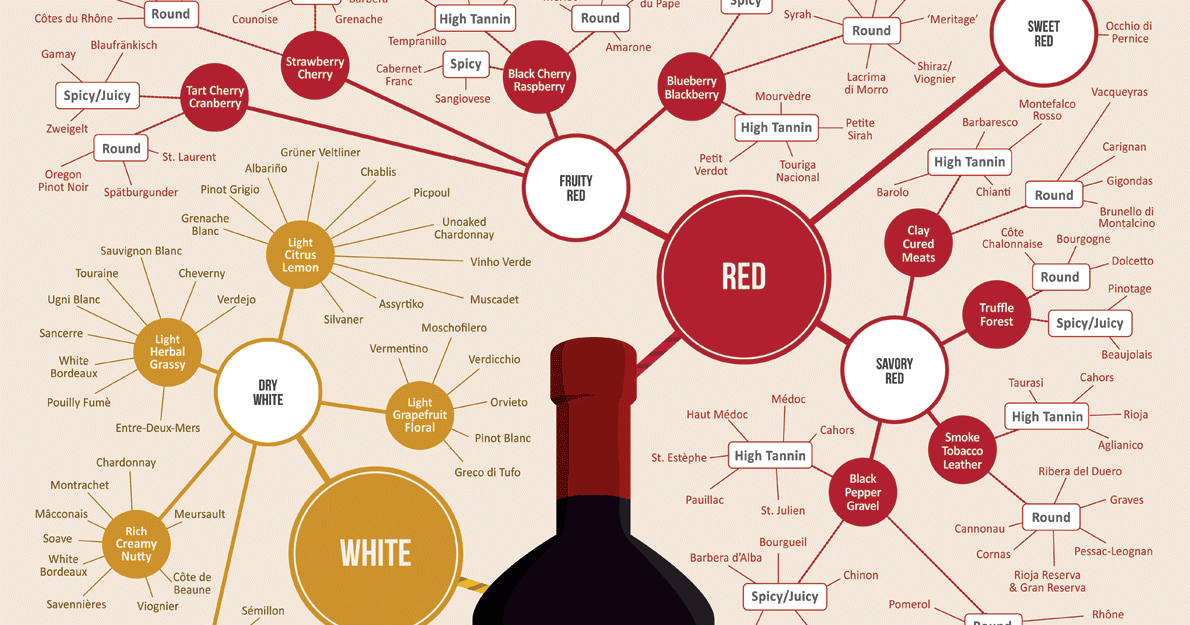

<div class="alert alert-block alert-success">
    <h1>Introduction</h1>
<p>According to experts, wine is differentiated according to its smell, flavor, and color, but we are not wine experts to say that wine is good or bad.
<p>What will we do then?
<p>In this scenario, we employ both Machine Learning and Deep Learning techniques to perform classification.
</div>

In [1]:
#START

<div class="alert alert-block alert-info">

## Import libraries
<p><b> Let's Load All Libraries that we need </b></p>

    
</div>

In [2]:
!pip install pyforest -q
!pip install sweetviz -q
!pip install lazypredict -q
from pyforest import *
import sweetviz as sv
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from xgboost import plot_tree
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix
import joblib

**UseFull function**

In [3]:
# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [4]:
def FindMissingColsPercentage(df):
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        # mean = sum / total
        pct = df[col].isnull().mean() * 100
        if missing_vals != 0:
          print('{} => {} [{}%]'.format(col, df[col].isnull().sum(), round(pct, 2)))
        total += missing_vals

    if total == 0:
        print("no missing values")

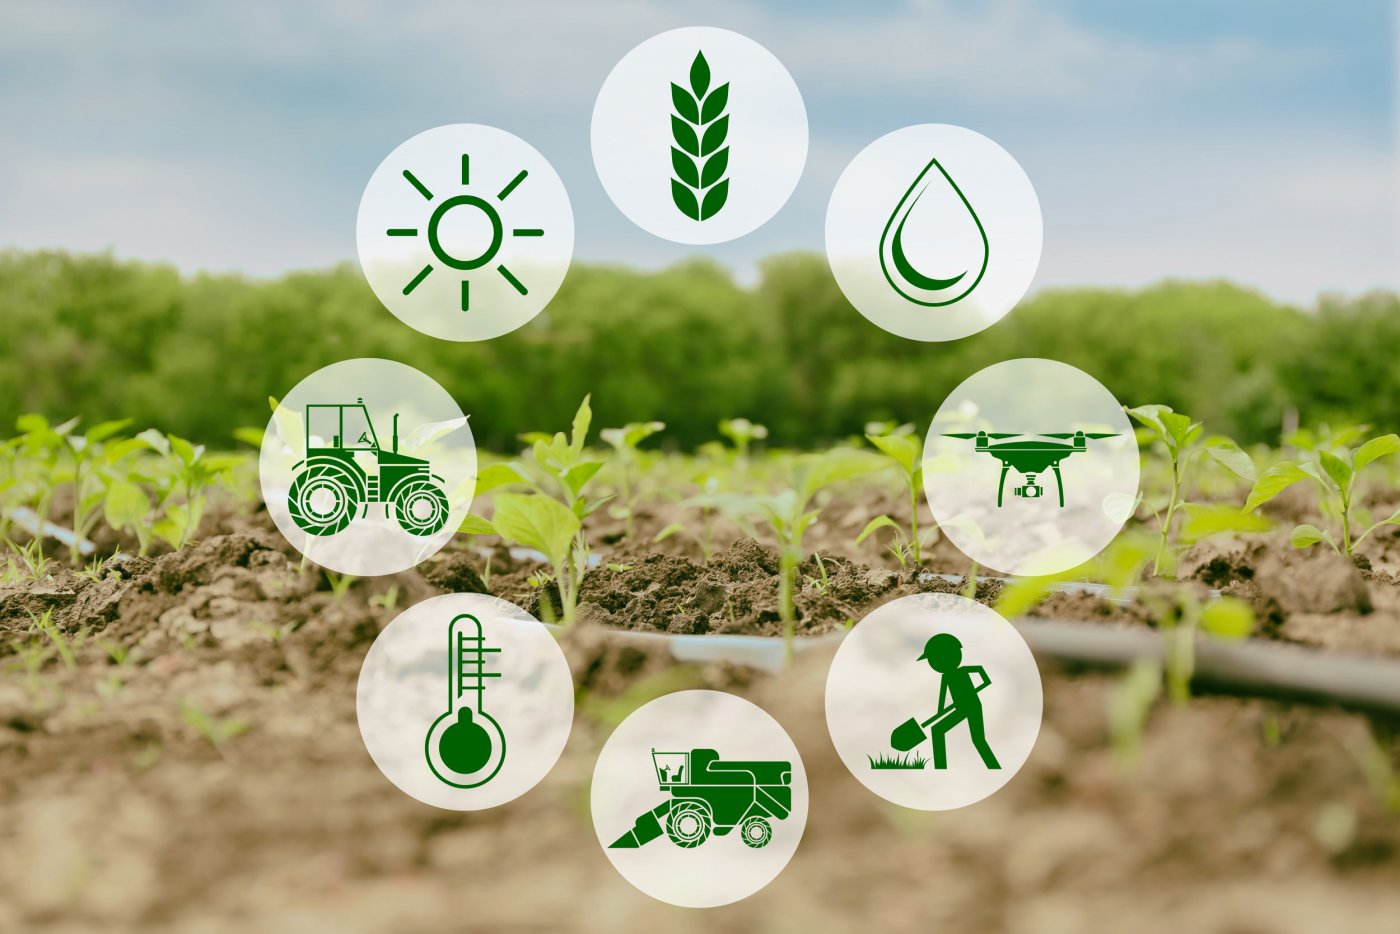

#Load Data

In [5]:
whiteWine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';')
redWine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Check for GPU

In order for our deep learning models to run as fast as possible, we'll need access to a GPU.

In [6]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-363d6545-2414-ff12-73b3-ef2a40c4c5cf)


<div class="alert alert-block alert-info">

### Exploratory Data Analysis (EDA)
#### Data Exploration



</div>

In [7]:
whiteWineReport = sv.analyze(whiteWine)

                                             |          | [  0%]   00:00 -> (? left)

In [8]:
whiteWineReport.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [9]:
RedWineReport = sv.analyze(redWine)

                                             |          | [  0%]   00:00 -> (? left)

In [10]:
RedWineReport.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
redWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
whiteWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [13]:
redWine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           7.40              0.70         0.00            1.90       0.08   
1           7.80              0.88         0.00            2.60       0.10   
2           7.80              0.76         0.04            2.30       0.09   
3          11.20              0.28         0.56            1.90       0.07   
4           7.40              0.70         0.00            1.90       0.08   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                11.00                 34.00     1.00 3.51       0.56   
1                25.00                 67.00     1.00 3.20       0.68   
2                15.00                 54.00     1.00 3.26       0.65   
3                17.00                 60.00     1.00 3.16       0.58   
4                11.00                 34.00     1.00 3.51       0.56   

   alcohol  quality  
0     9.40        5  
1     9.80        5  
2     9.80        5  
3     9.80        6  
4     9.40        5

In [14]:
whiteWine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           7.00              0.27         0.36           20.70       0.04   
1           6.30              0.30         0.34            1.60       0.05   
2           8.10              0.28         0.40            6.90       0.05   
3           7.20              0.23         0.32            8.50       0.06   
4           7.20              0.23         0.32            8.50       0.06   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                45.00                170.00     1.00 3.00       0.45   
1                14.00                132.00     0.99 3.30       0.49   
2                30.00                 97.00     1.00 3.26       0.44   
3                47.00                186.00     1.00 3.19       0.40   
4                47.00                186.00     1.00 3.19       0.40   

   alcohol  quality  
0     8.80        6  
1     9.50        6  
2    10.10        6  
3     9.90        6  
4     9.90        6

In [15]:
redWine.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594           6.20              0.60         0.08            2.00       0.09   
1595           5.90              0.55         0.10            2.20       0.06   
1596           6.30              0.51         0.13            2.30       0.08   
1597           5.90              0.65         0.12            2.00       0.07   
1598           6.00              0.31         0.47            3.60       0.07   

      free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
1594                32.00                 44.00     0.99 3.45       0.58   
1595                39.00                 51.00     1.00 3.52       0.76   
1596                29.00                 40.00     1.00 3.42       0.75   
1597                32.00                 44.00     1.00 3.57       0.71   
1598                18.00                 42.00     1.00 3.39       0.66   

      alcohol  quality  
1594    10.50        5  
1595    11.20        6  
1596    11.00        6  
1597    10.20        5  
1598    11.00        6

In [16]:
whiteWine.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4893           6.20              0.21         0.29            1.60       0.04   
4894           6.60              0.32         0.36            8.00       0.05   
4895           6.50              0.24         0.19            1.20       0.04   
4896           5.50              0.29         0.30            1.10       0.02   
4897           6.00              0.21         0.38            0.80       0.02   

      free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
4893                24.00                 92.00     0.99 3.27       0.50   
4894                57.00                168.00     0.99 3.15       0.46   
4895                30.00                111.00     0.99 2.99       0.46   
4896                20.00                110.00     0.99 3.34       0.38   
4897                22.00                 98.00     0.99 3.26       0.32   

      alcohol  quality  
4893    11.20        6  
4894     9.60        5  
4895     9.40        6  
4896    12.80        7  
4897    11.80        6

In [17]:
redWine.shape , whiteWine.shape

((1599, 12), (4898, 12))

In [18]:
redWine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count        1599.00           1599.00      1599.00         1599.00   
mean            8.32              0.53         0.27            2.54   
std             1.74              0.18         0.19            1.41   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.42            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free sulfur dioxide  total sulfur dioxide  density      pH  \
count    1599.00              1599.00               1599.00  1599.00 1599.00   
mean        0.09                15.87                 46.47     1.00    3.31   
std         0.05                10.46                 32.90     0.00    0.15   
min         0.01                 1.00                  6.00     0.99    2.74   
25%         0.07                 7.00                 22.00     1.00    3.21   
50%         0.08                14.00                 38.00     1.00    3.31   
75%         0.09                21.00                 62.00     1.00    3.40   
max         0.61                72.00                289.00     1.00    4.01   

       sulphates  alcohol  quality  
count    1599.00  1599.00  1599.00  
mean        0.66    10.42     5.64  
std         0.17     1.07     0.81  
min         0.33     8.40     3.00  
25%         0.55     9.50     5.00  
50%         0.62    10.20     6.00  
75%         0.73    11.10     6.00  
max         2.00    14.90     8.00

In [19]:
whiteWine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count        4898.00           4898.00      4898.00         4898.00   
mean            6.85              0.28         0.33            6.39   
std             0.84              0.10         0.12            5.07   
min             3.80              0.08         0.00            0.60   
25%             6.30              0.21         0.27            1.70   
50%             6.80              0.26         0.32            5.20   
75%             7.30              0.32         0.39            9.90   
max            14.20              1.10         1.66           65.80   

       chlorides  free sulfur dioxide  total sulfur dioxide  density      pH  \
count    4898.00              4898.00               4898.00  4898.00 4898.00   
mean        0.05                35.31                138.36     0.99    3.19   
std         0.02                17.01                 42.50     0.00    0.15   
min         0.01                 2.00                  9.00     0.99    2.72   
25%         0.04                23.00                108.00     0.99    3.09   
50%         0.04                34.00                134.00     0.99    3.18   
75%         0.05                46.00                167.00     1.00    3.28   
max         0.35               289.00                440.00     1.04    3.82   

       sulphates  alcohol  quality  
count    4898.00  4898.00  4898.00  
mean        0.49    10.51     5.88  
std         0.11     1.23     0.89  
min         0.22     8.00     3.00  
25%         0.41     9.50     5.00  
50%         0.47    10.40     6.00  
75%         0.55    11.40     6.00  
max         1.08    14.20     9.00

In [20]:
redWine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [21]:
whiteWine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<div class="alert alert-block alert-info" text-align='justify'>

## Data Cleaning
<p>Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.
<p>When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct.
<p>There is no one absolute way to prescribe the exact steps in the data cleaning process because the processes will vary from dataset to dataset.
<p>But it is crucial to establish a template for your data cleaning process so you know you are doing it the right way every time.
<p></br></p>
<b>Feature Engineering
    
</div>

<div class="alert alert-block alert-info">

<p><b> Check And Remove Duplication

</div>

In [22]:
print (redWine.duplicated().any() )
print (whiteWine.duplicated().any() )

True
True


In [23]:
print (redWine.duplicated().sum() )
print (whiteWine.duplicated().sum() )

240
937


In [24]:
redWine.drop_duplicates(inplace=True)
whiteWine.drop_duplicates(inplace=True)

<div class="alert alert-block alert-info">

### Missing data
### Checking which columns have missing data


> The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.


    
</div>

<div class="alert alert-block alert-success">

<p><b> Check And Remove Missing Value

</div>

In [25]:
FindMissingColsPercentage(redWine)

no missing values


In [26]:
FindMissingColsPercentage(whiteWine)

no missing values


<div class="alert alert-block alert-info">

<p><b> replace whitespace with underscore '_'
<p><b> lower case column names
<p><b> change column name

</div>
    
    

In [27]:
redWine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [28]:
redWine.columns   = redWine.columns.str.replace(" " , "_")
whiteWine.columns = whiteWine.columns.str.replace(" " , "_")

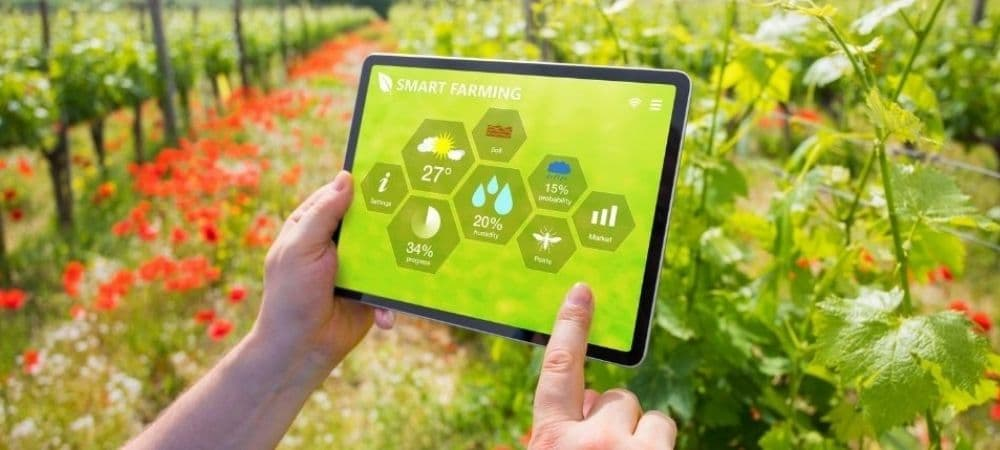

<div class="alert alert-block alert-info">
    
## Visualising the Data

</div>



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

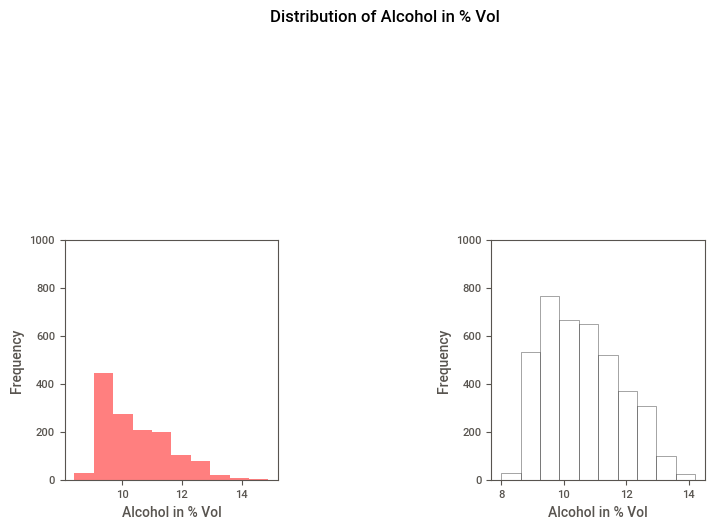

In [29]:
# Create Histogram
fig, ax = plt.subplots(1, 2)

ax[0].hist(redWine.alcohol, 10, facecolor ='red',
              alpha = 0.5, label ="Red wine")

ax[1].hist(whiteWine.alcohol, 10, facecolor ='white',
           ec ="black", lw = 0.5, alpha = 0.5,
           label ="White wine")

fig.subplots_adjust(left = 0, right = 1, bottom = 0,
               top = 0.5, hspace = 0.05, wspace = 1)

ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_ylim([0, 1000])
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")

fig.suptitle("Distribution of Alcohol in % Vol")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: title={'center': 'red Wine quality info'}, xlabel='quality', ylabel='count'>

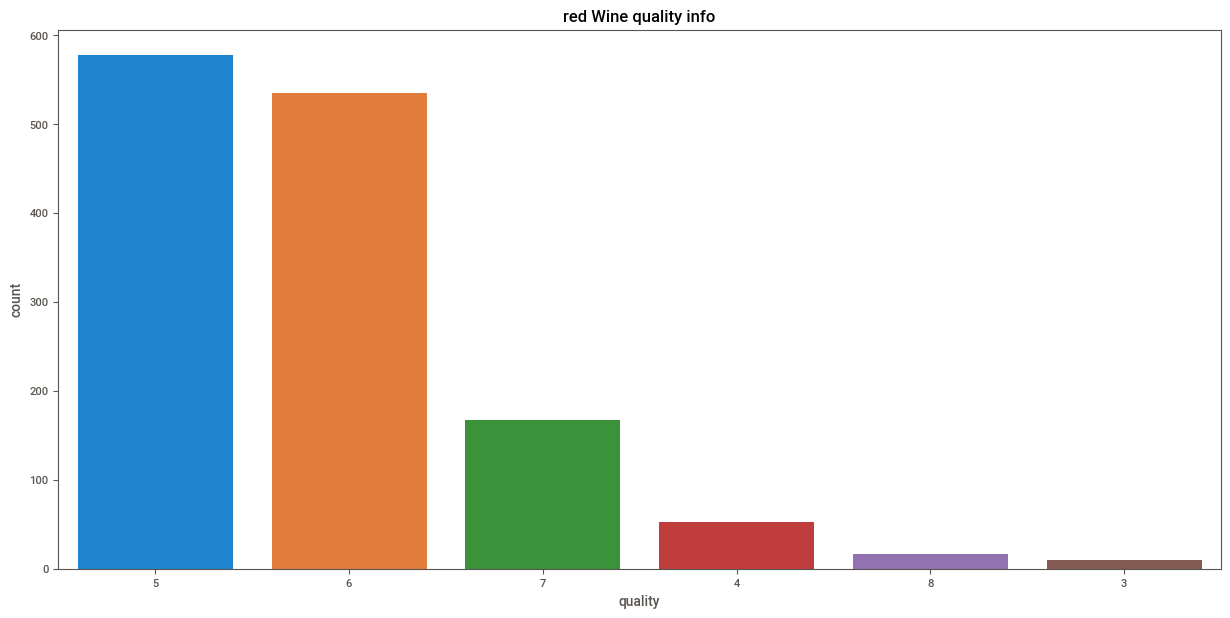

In [30]:
plt.figure(figsize=(15,7))
plt.title("red Wine quality info")
order = redWine['quality'].value_counts(ascending=False).index
sns.countplot(x='quality', data=redWine, order=order)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: title={'center': 'white Wine quality info'}, xlabel='quality', ylabel='count'>

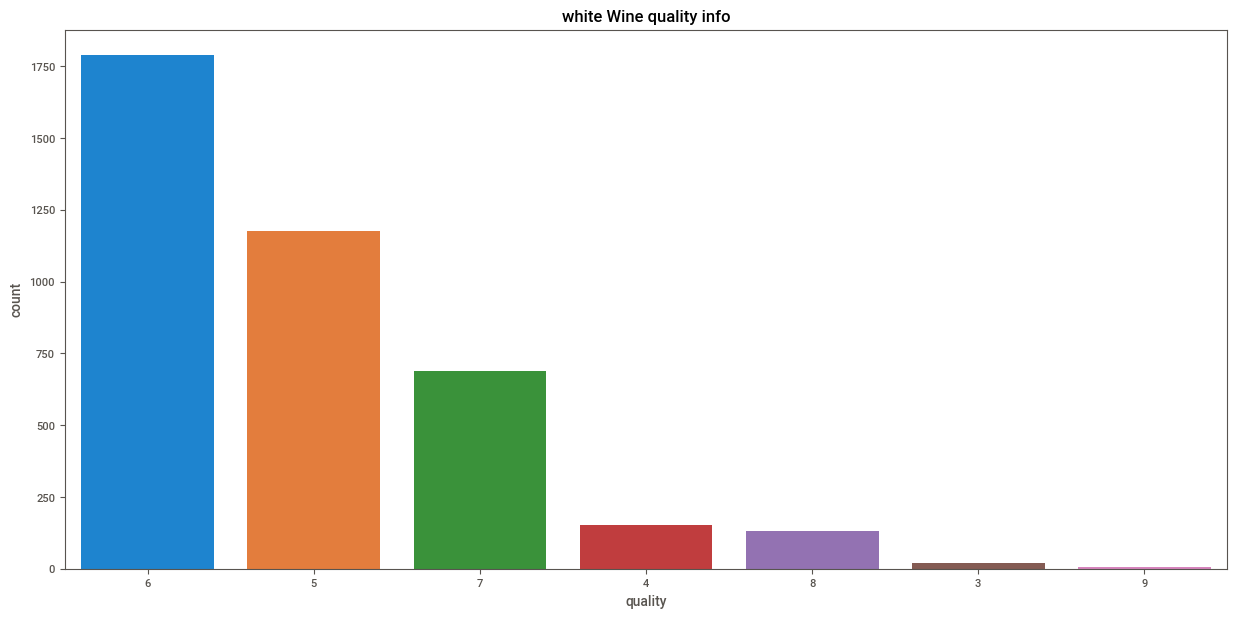

In [31]:
plt.figure(figsize=(15,7))
plt.title("white Wine quality info")
order = whiteWine['quality'].value_counts(ascending=False).index
sns.countplot(x='quality', data=whiteWine, order=order)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'quality pie Chart')

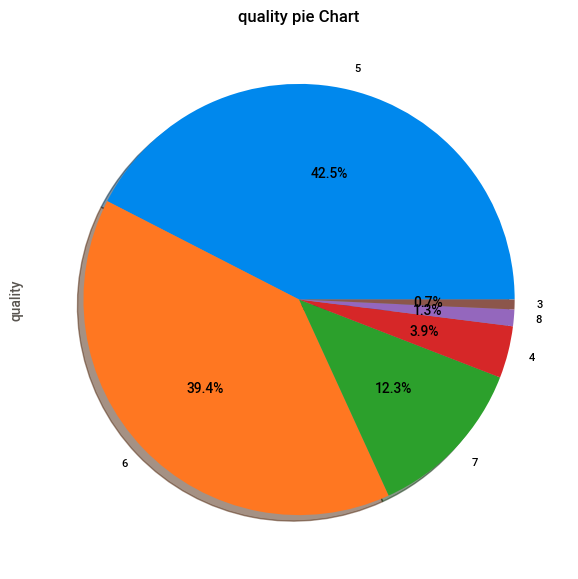

In [32]:
plt.figure(figsize=(15,7))
redWine['quality'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title("quality pie Chart")

In [33]:
#quality pie Chart

fig = go.Figure(data=[go.Pie(labels=redWine['quality'].value_counts().index, values=redWine['quality'].value_counts(), hole=.3)] )
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'quality pie Chart')

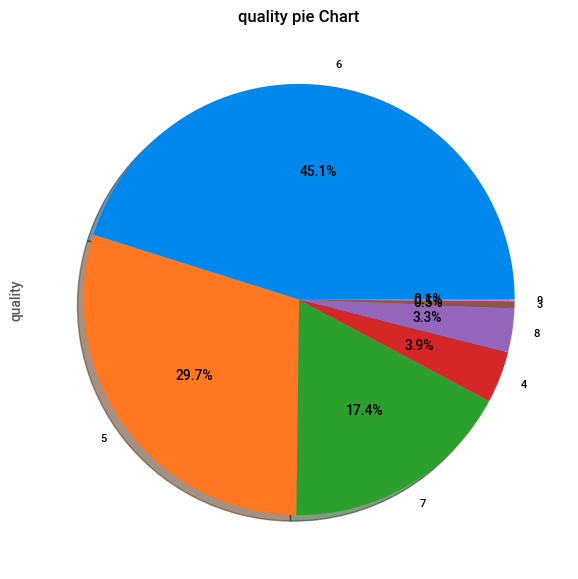

In [34]:
plt.figure(figsize=(15,7))
whiteWine['quality'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title("quality pie Chart")

In [35]:
#whiteWine pie

fig = go.Figure(data=[go.Pie(labels=whiteWine['quality'].value_counts().index, values=whiteWine['quality'].value_counts(), hole=.3)])
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0.98, 'Visualizing red Wine continuous columns')

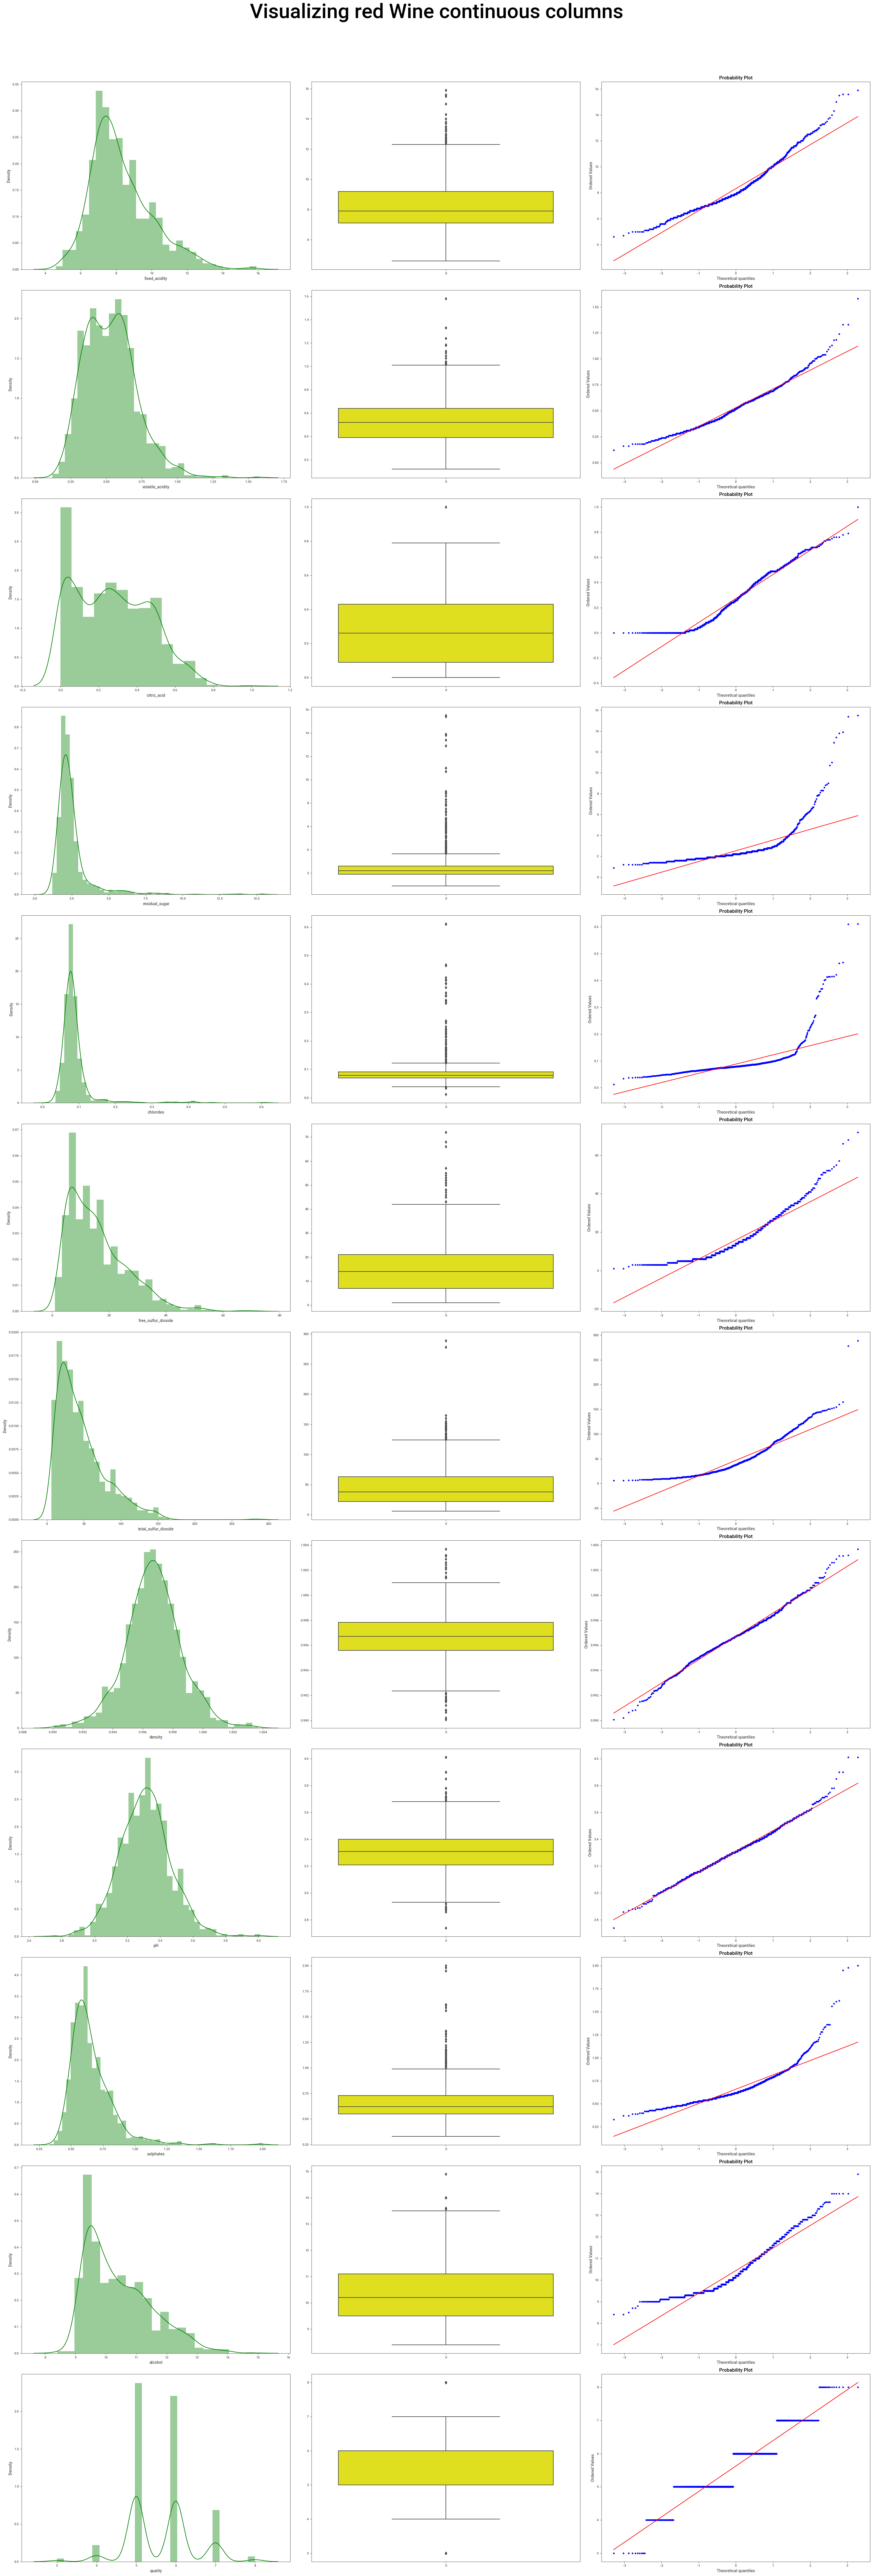

In [36]:
#Lets look at columns in deep

fig,ax = plt.subplots(12,3,figsize=(30,90))
for index,i in enumerate(redWine.columns):
    sns.distplot(redWine[i],ax=ax[index,0],color='green')
    sns.boxplot(redWine[i],ax=ax[index,1],color='yellow')
    stats.probplot(redWine[i],plot=ax[index,2])

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing red Wine continuous columns",fontsize=50)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0.98, 'Visualizing whit eWine continuous columns')

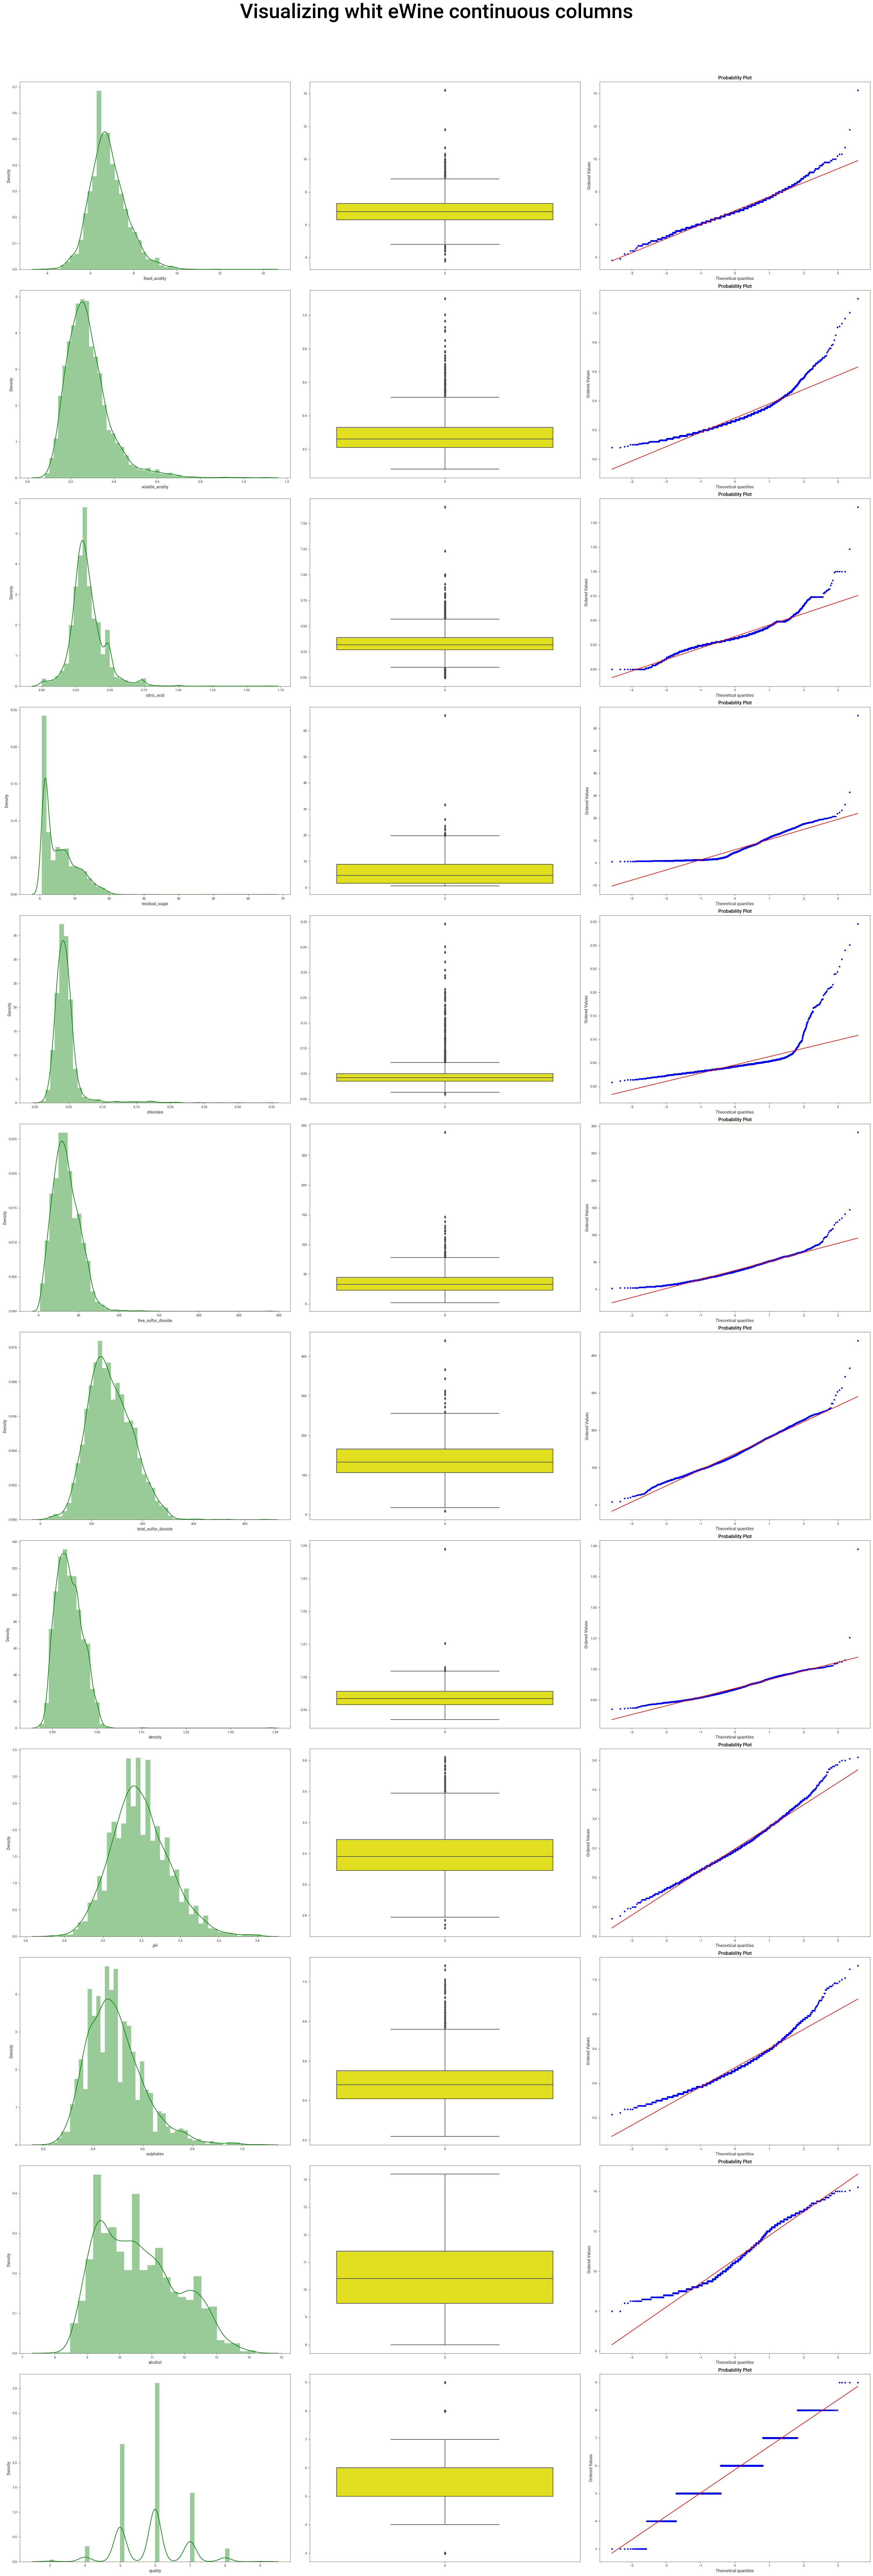

In [37]:
#Lets look at columns in deep

fig,ax = plt.subplots(12,3,figsize=(30,90))
for index,i in enumerate(whiteWine.columns):
    sns.distplot(whiteWine[i],ax=ax[index,0],color='green')
    sns.boxplot(whiteWine[i],ax=ax[index,1],color='yellow')
    stats.probplot(whiteWine[i],plot=ax[index,2])

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing whit eWine continuous columns",fontsize=50)

In [38]:
for column_name in redWine.columns:
    unique_values = len(redWine[column_name].unique())
    Format = "Feature '{}' has '{}' unique values"
    print(Format.format(column_name, unique_values))

Feature 'fixed_acidity' has '96' unique values
Feature 'volatile_acidity' has '143' unique values
Feature 'citric_acid' has '80' unique values
Feature 'residual_sugar' has '91' unique values
Feature 'chlorides' has '153' unique values
Feature 'free_sulfur_dioxide' has '60' unique values
Feature 'total_sulfur_dioxide' has '144' unique values
Feature 'density' has '436' unique values
Feature 'pH' has '89' unique values
Feature 'sulphates' has '96' unique values
Feature 'alcohol' has '65' unique values
Feature 'quality' has '6' unique values


In [39]:
for column_name in whiteWine.columns:
    unique_values = len(whiteWine[column_name].unique())
    Format = "Feature '{}' has '{}' unique values"
    print(Format.format(column_name, unique_values))

Feature 'fixed_acidity' has '68' unique values
Feature 'volatile_acidity' has '125' unique values
Feature 'citric_acid' has '87' unique values
Feature 'residual_sugar' has '310' unique values
Feature 'chlorides' has '160' unique values
Feature 'free_sulfur_dioxide' has '132' unique values
Feature 'total_sulfur_dioxide' has '251' unique values
Feature 'density' has '890' unique values
Feature 'pH' has '103' unique values
Feature 'sulphates' has '79' unique values
Feature 'alcohol' has '103' unique values
Feature 'quality' has '7' unique values


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

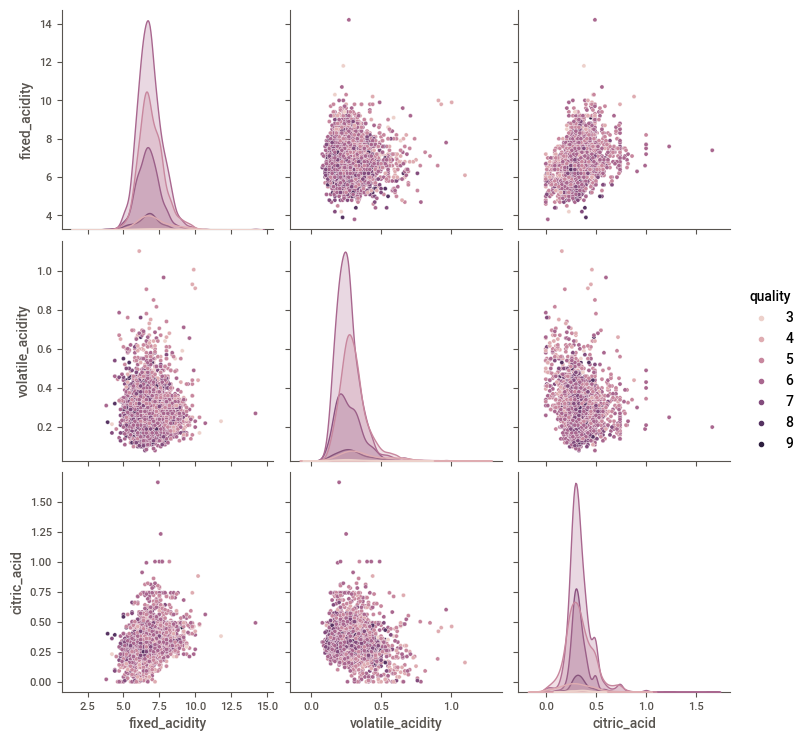

In [40]:
g = sns.pairplot(whiteWine, vars=["fixed_acidity", "volatile_acidity","citric_acid"], hue="quality")
plt.show(g)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

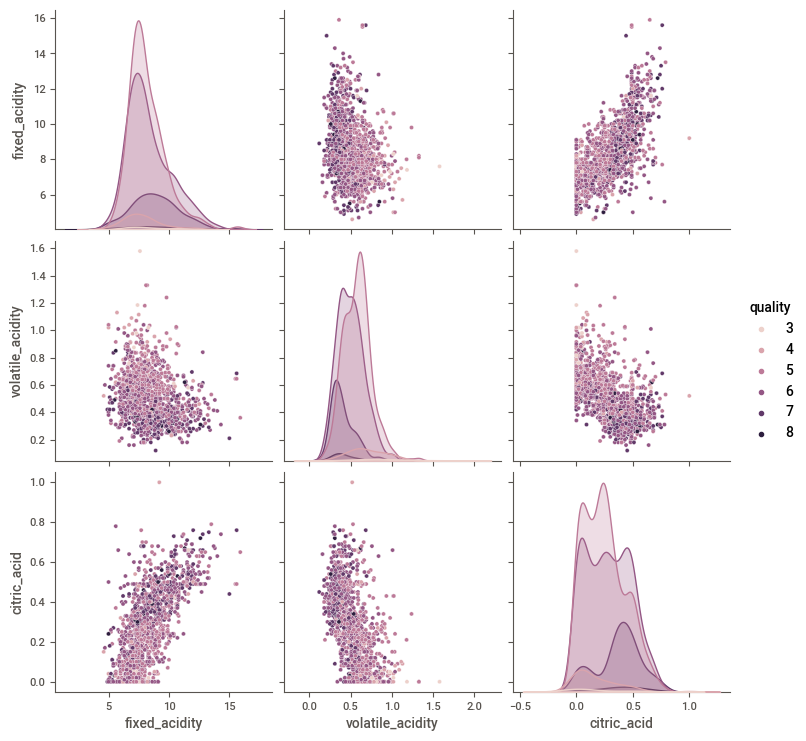

In [41]:
g = sns.pairplot(redWine, vars=["fixed_acidity", "volatile_acidity","citric_acid"], hue="quality")
plt.show(g)

In [42]:
correlation = redWine.corr()
print(correlation['quality'].sort_values(ascending = False),'\n')

quality                 1.00
alcohol                 0.48
sulphates               0.25
citric_acid             0.23
fixed_acidity           0.12
residual_sugar          0.01
free_sulfur_dioxide    -0.05
pH                     -0.06
chlorides              -0.13
total_sulfur_dioxide   -0.18
density                -0.18
volatile_acidity       -0.40
Name: quality, dtype: float64 



Index(['quality', 'alcohol', 'sulphates', 'citric_acid', 'fixed_acidity',
       'residual_sugar', 'free_sulfur_dioxide', 'pH', 'chlorides',
       'total_sulfur_dioxide'],
      dtype='object')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

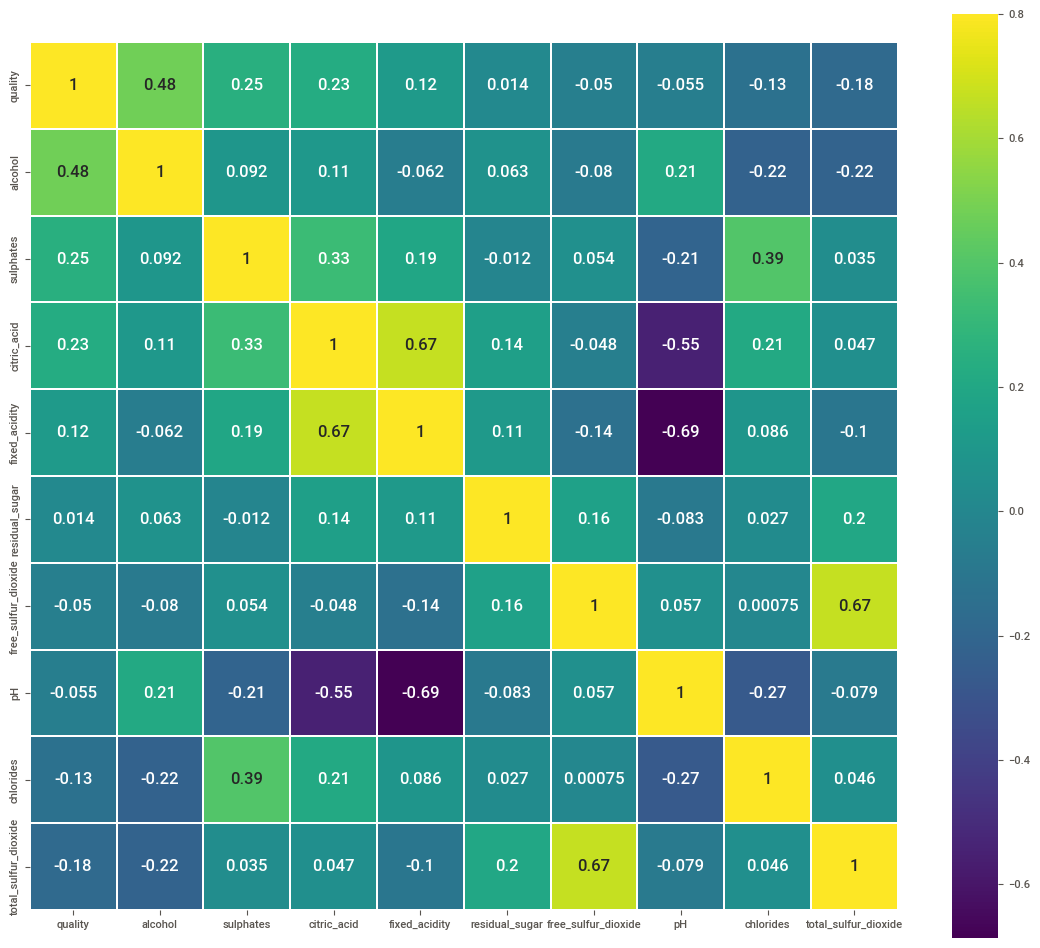

In [43]:
k= 10
cols = correlation.nlargest(k,'quality')['quality'].index
print(cols)
cm = np.corrcoef(redWine[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

Looking along the quality row (or column), we see that there are not really any strong correlations between quality and the several explanatory variables. Ones worth noting include alcohol with a correlation of 0.48, sulphates with 0.25, and volatile acidity with -0.39.

In [44]:
correlation = whiteWine.corr()
print(correlation['quality'].sort_values(ascending = False),'\n')

quality                 1.00
alcohol                 0.46
pH                      0.12
sulphates               0.05
free_sulfur_dioxide     0.01
citric_acid             0.01
residual_sugar         -0.12
fixed_acidity          -0.12
total_sulfur_dioxide   -0.18
volatile_acidity       -0.19
chlorides              -0.22
density                -0.34
Name: quality, dtype: float64 



Index(['quality', 'alcohol', 'pH', 'sulphates', 'free_sulfur_dioxide',
       'citric_acid', 'residual_sugar', 'fixed_acidity',
       'total_sulfur_dioxide', 'volatile_acidity'],
      dtype='object')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

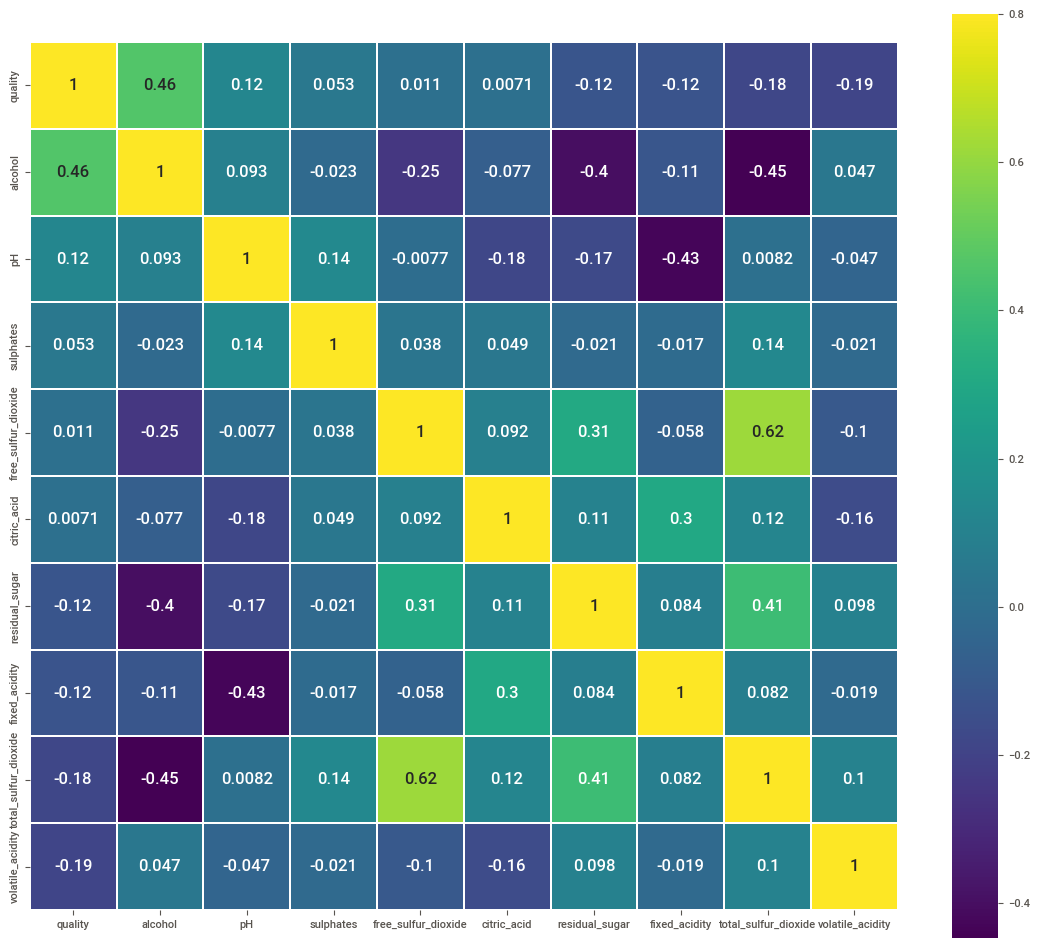

In [45]:
k= 10
cols = correlation.nlargest(k,'quality')['quality'].index
print(cols)
cm = np.corrcoef(whiteWine[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

Looking along the quality row (or column), we see that there are not really any strong correlations between quality and the several explanatory variables. Ones worth noting include alcohol with a correlation of 0.48, sulphates with 0.25, and volatile acidity with -0.39.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

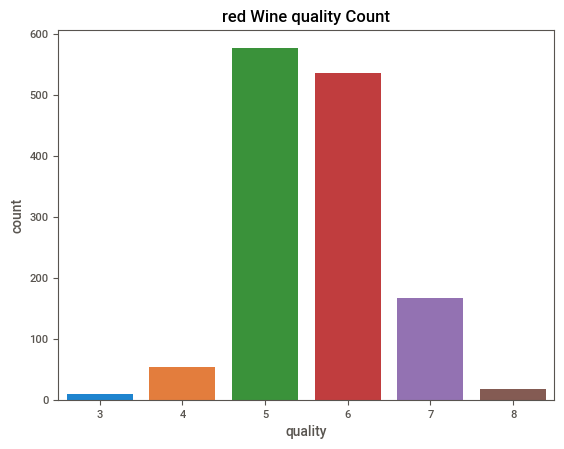

In [46]:
j = sns.countplot(x="quality", data=redWine)
plt.title("red Wine quality Count")
plt.show(j)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

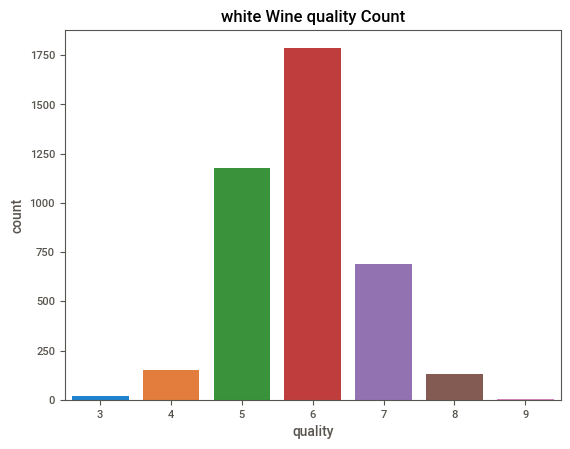

In [47]:
j = sns.countplot(x="quality", data=whiteWine)
plt.title("white Wine quality Count")
plt.show(j)

**Analysis Results **
<p>
We have 5 types of quality in DataSet - 3 to 8 ( red ) 3 to 9 ( white )
The Best quality 8 for red 9 for white
The less quality 3
<p>

**The elements highest effect on the quality of wine:**
<p>1 - Alcohol
<p>2 - Free sulfur dioxide
<p>3 - Total sulfur dioxide

**The elements lessest or a simple effect on the quality of wine:**
<p>1 - Fixed acidity
<p>2 - Volatile acidity
<p>3 - Citric acid
<p>4 - Residual sugar
<p>5 - Chlorides
<p>6 - Density
<p>7 - PH
<p>8 - Sulphates


 Since a quality score is a discrete value, the problem could be considered as a multi-class classification problem. The last layer of our network will thus involve a softMax regression.

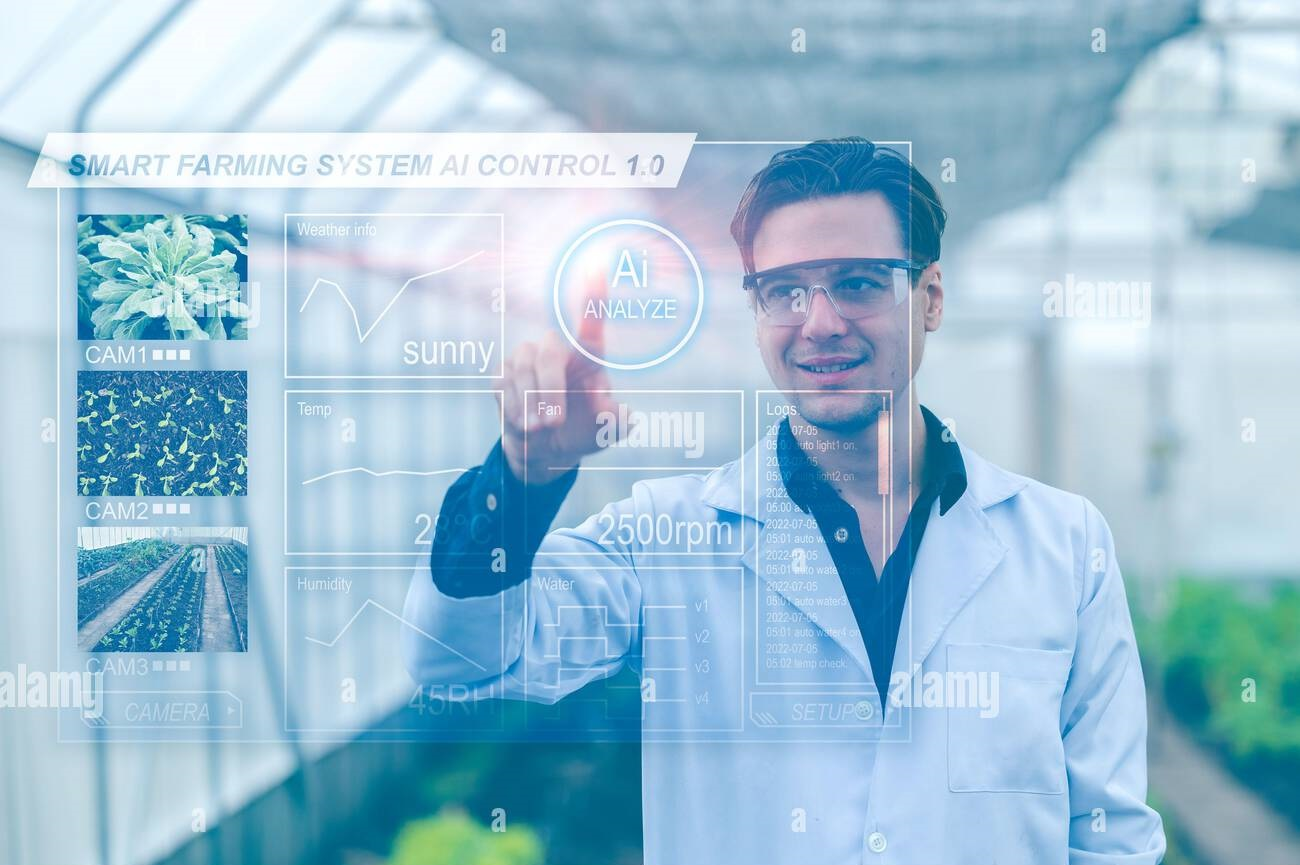

<div class="alert alert-block alert-danger">

<h1> Model Development
</div>

In [48]:
# Add new column to red wine 1
redWine['type'] = 1

# Add new column to white wine 0
whiteWine['type'] = 0

In [49]:
redWine.shape,
whiteWine.shape

(3961, 13)

<b>Two approaches to make a balanced dataset out of an imbalanced</b>
<p>
one are under-sampling and over-sampling.
<p>
<b>Under-sampling</b>
<p>
Under-sampling balances the dataset by reducing the size of samples
<p>
<b>Over-sampling</b>
<p>
It tries to balance dataset by increasing the size of samples

In [50]:
# Easy Balancing
whiteWine = whiteWine[:1359]

In [51]:
# Append `white` to `red`
wineData = redWine.append(whiteWine, ignore_index = True)
wineData.reset_index(inplace=True,drop=True)

In [52]:
wineData.columns = wineData.columns.str.replace(' ', "_")

In [53]:
wineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         2718 non-null   float64
 1   volatile_acidity      2718 non-null   float64
 2   citric_acid           2718 non-null   float64
 3   residual_sugar        2718 non-null   float64
 4   chlorides             2718 non-null   float64
 5   free_sulfur_dioxide   2718 non-null   float64
 6   total_sulfur_dioxide  2718 non-null   float64
 7   density               2718 non-null   float64
 8   pH                    2718 non-null   float64
 9   sulphates             2718 non-null   float64
 10  alcohol               2718 non-null   float64
 11  quality               2718 non-null   int64  
 12  type                  2718 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 276.2 KB


In [54]:
print( wineData.duplicated().any() )

False


In [55]:
FindMissingColsPercentage(wineData)

no missing values


In [56]:
correlation = wineData.corr()
print(correlation['type'].sort_values(ascending = False),'\n')

type                    1.00
volatile_acidity        0.64
sulphates               0.51
density                 0.48
chlorides               0.47
fixed_acidity           0.43
pH                      0.30
alcohol                 0.04
quality                -0.13
citric_acid            -0.25
residual_sugar         -0.41
free_sulfur_dioxide    -0.56
total_sulfur_dioxide   -0.77
Name: type, dtype: float64 



In [57]:
wineData_org = wineData.copy()

## Drop Highly Correlated Features

In [58]:
X = wineData.drop(["type",'volatile_acidity' , 'sulphates' ] , axis=1)
y = wineData["type"]

In [59]:
X

fixed_acidity  citric_acid  residual_sugar  chlorides  \
0              7.40         0.00            1.90       0.08   
1              7.80         0.00            2.60       0.10   
2              7.80         0.04            2.30       0.09   
3             11.20         0.56            1.90       0.07   
4              7.40         0.00            1.80       0.07   
...             ...          ...             ...        ...   
2713           7.50         0.49            1.70       0.03   
2714           5.80         0.49            4.90       0.04   
2715           6.90         0.49           23.50       0.06   
2716           8.10         0.49           11.80       0.05   
2717           8.20         0.49            5.20       0.04   

      free_sulfur_dioxide  total_sulfur_dioxide  density   pH  alcohol  \
0                   11.00                 34.00     1.00 3.51     9.40   
1                   25.00                 67.00     1.00 3.20     9.80   
2                   15.00                 54.00     1.00 3.26     9.80   
3                   17.00                 60.00     1.00 3.16     9.80   
4                   13.00                 40.00     1.00 3.51     9.40   
...                   ...                   ...      ...  ...      ...   
2713                44.00                109.00     0.99 3.07    12.50   
2714                44.00                118.00     0.99 3.34     9.50   
2715                59.00                235.00     1.00 2.98     8.60   
2716                46.00                212.00     1.00 3.09    10.00   
2717                19.00                100.00     0.99 3.12    10.10   

      quality  
0           5  
1           5  
2           5  
3           6  
4           5  
...       ...  
2713        6  
2714        7  
2715        5  
2716        7  
2717        6  

[2718 rows x 10 columns]

In [60]:
X_train,X_test , y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<IPython.core.display.Javascript object>

In [61]:
#@title LazyClassifier(All Classifier)
#Create Models
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [00:02<00:00, 13.69it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SGDClassifier                      0.99               0.99     0.99      0.99   
RidgeClassifierCV                  0.99               0.99     0.99      0.99   
RidgeClassifier                    0.99               0.99     0.99      0.99   
Perceptron                         0.99               0.99     0.99      0.99   
LinearDiscriminantAnalysis         0.99               0.99     0.99      0.99   
LogisticRegression                 0.99               0.99     0.99      0.99   
LinearSVC                          0.99               0.99     0.99      0.99   
SVC                                0.99               0.99     0.99      0.99   
CalibratedClassifierCV             0.99               0.99     0.99      0.99   
ExtraTreesClassifier               0.99               0.99     0.99      0.99   
RandomForestClassifier      

In [62]:
#@title LogisticRegression
#Create Model
LR_Model = LogisticRegression(random_state = 42)
#Fit
LR_Model.fit(X_train,y_train)
#Predict
y_pred_lr = LR_Model.predict(X_test)

<IPython.core.display.Javascript object>

In [63]:
mae_lr = mean_absolute_error(y_test , y_pred_lr)
print( "LogisticRegression mean absolute error = " , mae_lr )

LogisticRegression mean absolute error =  0.051470588235294115


In [64]:
acc_lr = accuracy_score(y_test , y_pred_lr)
print( "LogisticRegression accuracy score = " , acc_lr )

LogisticRegression accuracy score =  0.9485294117647058


In [65]:
#@title XGBClassifier
# create model instance
XGB_Model = XGBClassifier()
# fit model
XGB_Model.fit(X_train, y_train)
# make predictions
y_pred_xgb = XGB_Model.predict(X_test)

<Axes: >

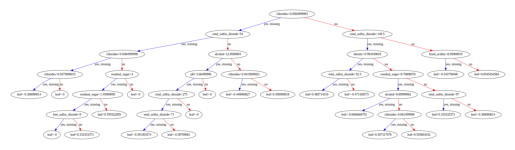

In [66]:
plot_tree(XGB_Model)

In [67]:
xgb_mse = mean_absolute_error(y_test,y_pred_xgb )
print( "XGBClassifier mean absolute error = " , xgb_mse )

XGBClassifier mean absolute error =  0.012867647058823529


In [68]:
acc_xgb = accuracy_score(y_test , y_pred_xgb)
print( "XGBClassifier accuracy score = " , acc_xgb )

XGBClassifier accuracy score =  0.9871323529411765


In [69]:
data_prep = {'Actual': y_test, 'XGBClassifier': y_pred_xgb , 'LogisticRegression': y_pred_lr  }
WineDataPredict = pd.DataFrame(data_prep)
WineDataPredict.reset_index(inplace=True,drop=True)
WineDataPredict.head(7)

<IPython.core.display.Javascript object>

Actual  XGBClassifier  LogisticRegression
0       0              0                   0
1       1              1                   1
2       0              0                   0
3       0              0                   0
4       1              1                   1
5       1              1                   1
6       1              1                   1

In [70]:
#@title Save Model
joblib.dump(XGB_Model, 'WineClassification_Model.joblib')

['WineClassification_Model.joblib']

Lead Model

In [71]:
def WineClassification(input_data):
    # Load the best model from the saved file
    model = joblib.load('./WineClassification_Model.joblib')
    # Perform predictions using the loaded model
    predictions = model.predict(input_data)
    # predictions = predictions.squeeze()
    predictions = predictions[0]
    return predictions

In [72]:
X.sample(3)

fixed_acidity  citric_acid  residual_sugar  chlorides  \
2202           6.40         0.43            7.10       0.04   
1513           7.10         0.15            1.20       0.05   
571            7.10         0.02            4.40       0.10   

      free_sulfur_dioxide  total_sulfur_dioxide  density   pH  alcohol  \
2202                60.00                221.00     1.00 3.09     9.40   
1513                61.00                183.00     0.99 3.09     9.20   
571                  5.00                 13.00     1.00 3.41    11.00   

      quality  
2202        6  
1513        5  
571         4

In [73]:
wineData.sample(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
585            8.60              0.80         0.11            2.30       0.08   
1636           6.40              0.34         0.23            6.30       0.04   
2629           7.00              0.17         0.74           12.80       0.04   

      free_sulfur_dioxide  total_sulfur_dioxide  density   pH  sulphates  \
585                 12.00                 31.00     1.00 3.40       0.48   
1636                37.00                143.00     0.99 3.19       0.65   
2629                24.00                126.00     0.99 3.26       0.38   

      alcohol  quality  type  
585      9.90        5     1  
1636    10.00        6     0  
2629    12.20        8     0

In [74]:
#input  = fixed_acidity	citric_acid	residual_sugar	chlorides	free_sulfur_dioxide	total_sulfur_dioxide	density	pH	alcohol	quality
#output = White Wine(0)  -  redWine(1)

In [75]:
#Make predictions using the loaded model
data = np.array([[5.90, 0.33, 7.40, 0.04, 58.00, 205.00, 0.99, 3.26, 9.60 , 5]])
WineClassification(data)

<IPython.core.display.Javascript object>

0

In [76]:
#Make predictions using the loaded model
data = np.array([[7.50, 0.48, 5.60, 0.07, 22.00, 84.00, 1.00, 3.32, 9.60 , 4]])
WineClassification(data)

<IPython.core.display.Javascript object>

1

In [77]:
#@title Deep Learning Model

In [78]:
X_train.shape

(2174, 10)

In [79]:
#set random seed
tf.random.set_seed(42)

#Create Model
DLModel = tf.keras.Sequential([
    tf.keras.layers.Dense(512,input_shape = [10]),
    tf.keras.layers.Dense(256,activation= "relu"),
    tf.keras.layers.Dense(128,activation= "relu"),
    tf.keras.layers.Dense(64,activation= "relu"),
    tf.keras.layers.Dense(32,activation= "relu"),
    tf.keras.layers.Dense(1,activation ="sigmoid")
],name='WineClassificationModel')

#Compile
DLModel.compile(
    optimizer=tf.keras.optimizers.Adam() ,
    loss=tf.keras.losses.binary_crossentropy,
    metrics=["accuracy"]
)

callback  = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=20,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

#Summary
DLModel.summary()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model: "WineClassificationModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5632      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 180,225
Trainable params: 180

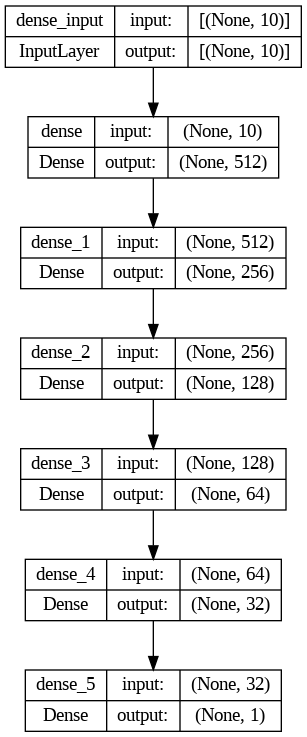

In [80]:
plot_model(DLModel, show_shapes=True)

In [81]:
#Fit Model
WineClassificationHistory = DLModel.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    epochs = 100 , verbose=0 ,
    callbacks=[callback,
               # Add TensorBoard callback to model (callbacks parameter takes a list)
                                            create_tensorboard_callback(dir_name="tensorflow_hub_WineClassification", # save experiment logs here
                                                                        experiment_name="WineClassification")]) # name of log files

<IPython.core.display.Javascript object>

Saving TensorBoard log files to: tensorflow_hub_WineClassification/WineClassification/20230716-161710


In [82]:
DLModel.evaluate(X_test,y_test)

17/17 [==============================] - 0s 3ms/step - loss: 0.1216 - accuracy: 0.9596


[0.12156645208597183, 0.9595588445663452]

<IPython.core.display.Javascript object>

<Axes: >

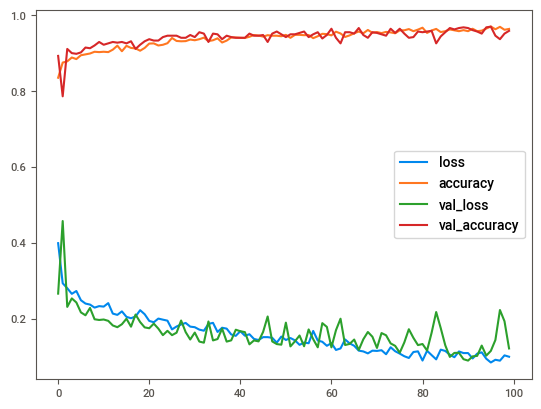

In [83]:
pd.DataFrame(WineClassificationHistory.history).plot()

In [84]:
y_pred_DL = DLModel.predict(X_test)

17/17 [==============================] - 0s 2ms/step


In [85]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_pred_DL))

<IPython.core.display.Javascript object>

array([[270,   2],
       [ 20, 252]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

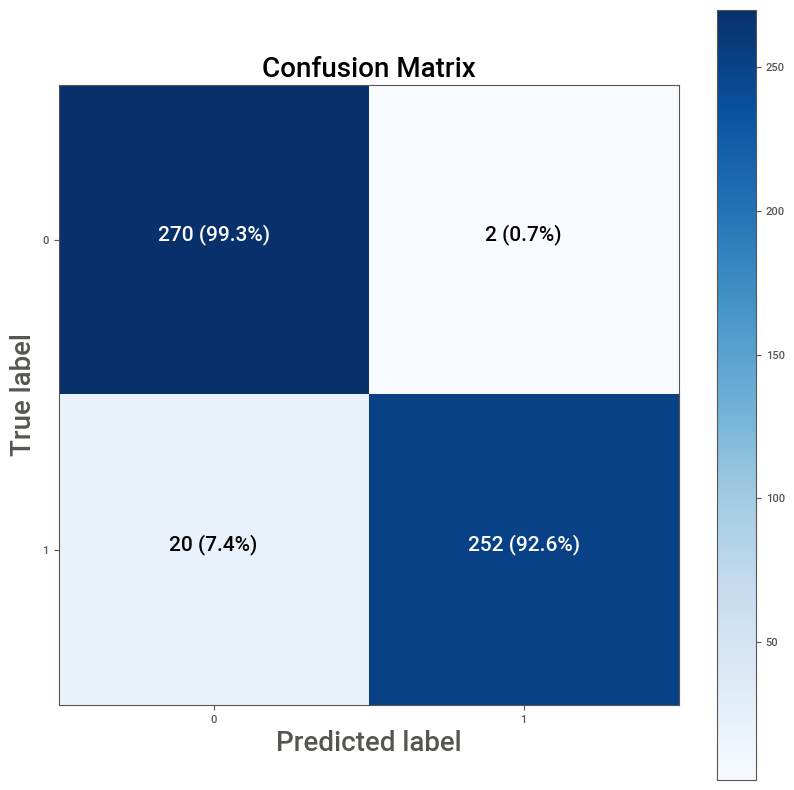

In [86]:
# confusion matrix Visualization

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred_DL))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [87]:
data_prep = {'Actual': y_test, 'XGBClassifier': y_pred_xgb , 'LogisticRegression': y_pred_lr , 'DeepLearning' : tf.round(y_pred_DL.squeeze()) }
WineDataPredict = pd.DataFrame(data_prep)
WineDataPredict.reset_index(inplace=True,drop=True)
WineDataPredict.head(7)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Actual  XGBClassifier  LogisticRegression  DeepLearning
0       0              0                   0          0.00
1       1              1                   1          1.00
2       0              0                   0          0.00
3       0              0                   0          0.00
4       1              1                   1          1.00
5       1              1                   1          1.00
6       1              1                   1          1.00

In [88]:
#@title Save a model best model
DLModel.save("WineClassification_DL.h5")

In [89]:
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./tensorflow_hub_WineClassification/ \
  --name "Wine Type Models" \
  --description "Comparing Wine Type models architectures " \
  --one_shot

2023-07-16 16:17:48.999684: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/YbPtowN5S2i96pYqEC7eqQ/

[2023-07-16T16:17:50] Started scanning logdir.
[2023-07-16T16:17:51] Total uploaded: 1476 scalars, 0 tensors, 0 binary objects
[2023-07-16T16:17:51] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/YbPtowN5S2i96pYqEC7eqQ/


In [90]:
#END

<div class="alert alert-block alert-danger">
<p><b>One small positive thought can change your whole day :)

<p>Be positive. Be true. Be kind:)

</div>

<p>Thank you very much for your attention

<div class="alert alert-block alert-success">
<p><b>  Arian Azmoudeh </b></p>
<p> https://www.linkedin.com/in/arianazmoudeh
</div>

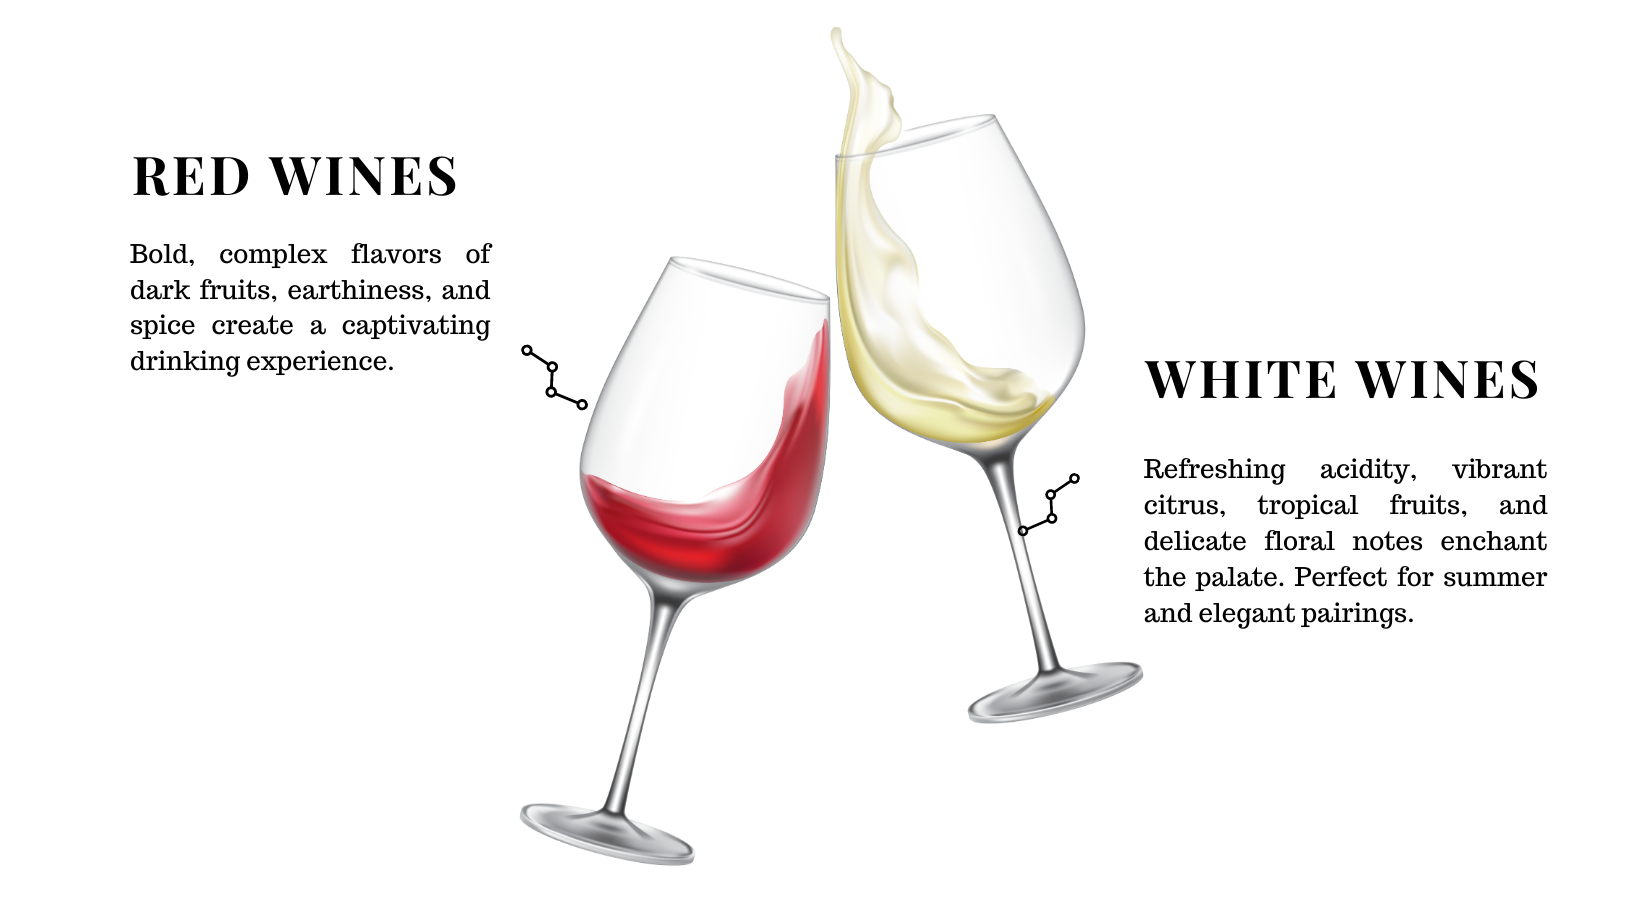

In [91]:
#THANKS